---
<div align="center">
    
# S&P-500 | Stock Forecasting and Optimization
</div>

---

---
<div align="center">
    
## Problem Formulation [TO BE FIXED LATER]
</div>

---

### Context

The stock market is highly volatile and unpredictable which makes stock price forecasting and portfolio optimization challenging tasks. Therefore, since investors seek strategies that can provide risk-adjusted returns efficiently, this project aims to help them.

### Resolution Approach

This project focuses on using machine learning algorithms to forecast future stock prices of the S&P-500 Market Index and thereafter apply optimization methods to select the best set of stocks for daily investment. 

It combines data-driven forecasts with optimization techniques to maximize returns or minimize risks, creating a solution for real-world financial challenges.

### Planned Work

To properly develop this project, we have structured it along the following phases:
1. Data Preprocessing & Engineering
2. Data Cleaning
3. Exploratory Data Analysis - We aim to obtain greater insights on how the data 
4. Model Development and Evaluation - Use models like LSTMs, LGBM, Using proper training methodologies [Use a Window and simply move it N days further at each iteration and consider the new window as the training data of the model until we have reached the end of the data, aka, 2024 ]. Note: Always test with the 2024 data.
6. Portfolio Optimization - Using Monte Carlo, Min-Max and even genetic Algorithms
7. Results Analysis

---
<div align="center">
    
## Project Dependencies

</div>

---

In [1]:
# !pip install requests-cache requests-ratelimiter
# !pip install --upgrade yfinance

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# !pip install fbprophet
# !conda install -c anaconda ephem -y
# !conda install -c conda-forge pystan -y
# !conda install -c conda-forge fbprophet -y
# !pip install holidays==0.9.12

# !pip install pystan==2.19.1.1 prophet
# !pip install cmdstanpy==0.9.5

# !pip install fbprophet==0.6
# !pip install holidays==0.9.11

# !pip install lightgbm 

In [5]:
# Importing Dependencies
import numpy as np
import pandas as pd

# Import json to help save dictionaries into .json files
import json

# Import matplotlib to help visualize the data
import matplotlib.pyplot as plt

# Import Datetime to properly format the Dates from the Dataset
from datetime import (datetime, timedelta)
from datetime import datetime as dt

# Importing an API to handle the Datset from Yahoo Finance
import yfinance as yf
from yfinance import (Ticker)

# from fbprophet import Prophet
from lightgbm import (LGBMRegressor)

# Import a Sequential Model from tensorflow alongside the Adam Optimizer and layers
from tensorflow.keras.models import (Sequential)
from tensorflow.keras.optimizers import (Adam)
from tensorflow.keras import (layers)

from DataPreProcessing.DataExtraction import (extractSP500StocksInformationWikipedia, getSP500StockMarketInformation, getStockMarketInformation)
from DataPreProcessing.DataVisualization import (plotFeatureDistribution, plotStockClosingPrice, plotStockStats)

from ModelDevelopmentAndEvaluation.StockPriceManager import (stockPriceManager)

from Utils.Configuration import (loadConfig, loadInitialPathsConfig, loadFinalPathsConfig, loadInitialSetup)

# from pprint import pprint

In [6]:
# Load the configs
config = loadConfig()
pathsConfig = loadInitialPathsConfig()
initialSetup = loadInitialSetup()
initialSetup

{'initialMoney': 1000,
 'buyFee': 1,
 'sellFee': 1,
 'limitStocksPerDay': 100,
 'minimizeRisk': True,
 'maximizeRisk': False,
 'minimizeReturn': False,
 'maximizeReturn': True}

---
<div align="center">

## Data Preprocessing
</div>

---

---
### Exploratory Data Analysis
---

> ADD A DESCRIPTIVE ANALYSIS FOR THE EXPLORATORY DATA ANALYSIS

In [7]:
# dataset aquired @ https://www.nasdaq.com/market-activity/stocks/screener
# It consists of all the publicly available stocks globally
worldWideStocks = pd.read_csv('./Datasets/Stocks.csv')
worldWideStocks.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$139.65,2.780,2.031%,4.012531e+10,United States,1999.0,1795434,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$40.73,0.160,0.394%,1.052279e+10,United States,2016.0,2930997,Industrials,Aluminum
2,AACG,ATA Creativity Global American Depositary Shares,$1.04,0.030,2.97%,3.328014e+07,China,2008.0,64843,Real Estate,Other Consumer Services
3,AACT,Ares Acquisition Corporation II Class A Ordina...,$10.87,-0.005,-0.046%,0.000000e+00,NaN,2023.0,26869,Finance,Blank Checks
4,AADI,Aadi Bioscience Inc. Common Stock,$1.96,-0.030,-1.508%,4.824508e+07,United States,NaN,24640,Health Care,Biotechnology: Pharmaceutical Preparations


In [8]:
# Extract some information of the S&P-500 Stocks from wikipedia
sp500Stocks = extractSP500StocksInformationWikipedia(pathsConfig)

# Compute the unique stocks
uniqueStocks = np.unique(sp500Stocks.Symbol.to_numpy())
print(f"There are {uniqueStocks.size} Unique Stocks out of {sp500Stocks.shape[0]} total Available Stocks on the S&P 500 Program.")

There are 503 Unique Stocks out of 503 total Available Stocks on the S&P 500 Program.


Which means that each row corresponds to a different stock.

In [9]:
# Inspect the DataFrame
sp500Stocks.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
1,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977
2,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
3,ABNB,Airbnb,Consumer Discretionary,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
4,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888


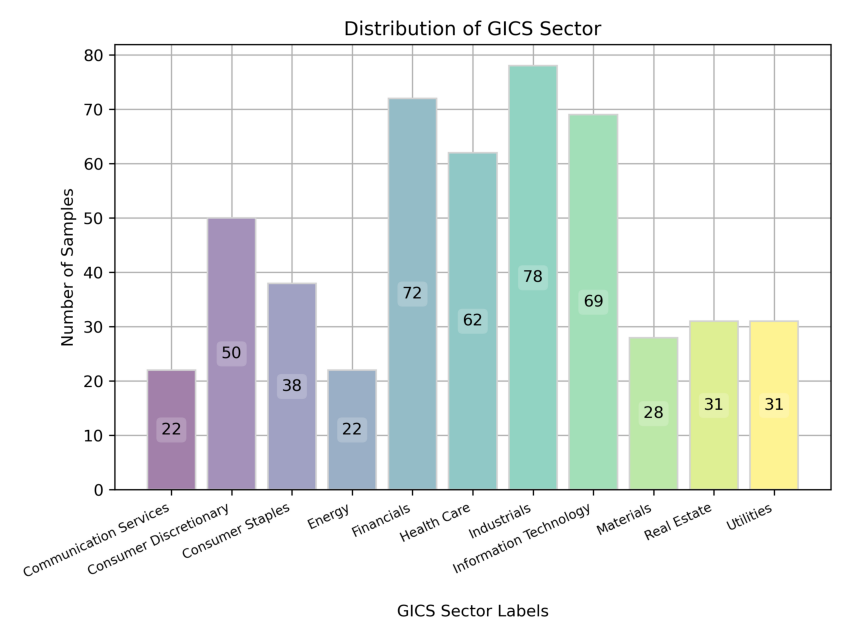

In [10]:
# Plot the Distribution for the GICS Sectors of all the Companies
plotFeatureDistribution(df=sp500Stocks, classFeature='GICS Sector', forceCategorical=False, pathsConfig=pathsConfig, featureDecoder=None)

In [11]:
# Extract a S&P-500 Stock Market Information
sp500MarketHistory = getSP500StockMarketInformation(config=config, pathsConfig=pathsConfig)

# Inpect the DataFrame
sp500MarketHistory.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3991400000,0.0,0.0,0.016043
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2491020000,0.0,0.0,0.003116
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4972660000,0.0,0.0,0.000546
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5270680000,0.0,0.0,0.004001
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4389590000,0.0,0.0,0.002882


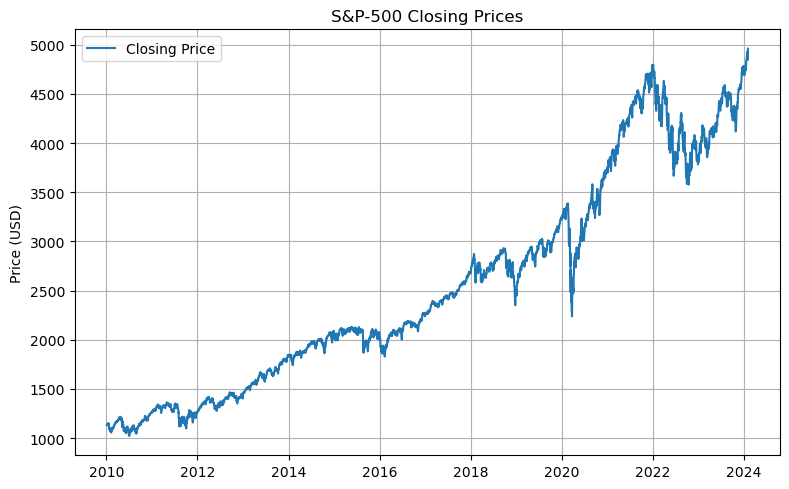

In [12]:
# Let's see a historical view of the closing price
plotStockClosingPrice(stockMarketHistory=sp500MarketHistory, title='S&P-500 Closing Prices')

In [13]:
# Extract the dates in which the market is open in January 2024 - Days in which we are going to perform inference
predictionDates = sp500MarketHistory[sp500MarketHistory['Date'] >= str(dt(2024, 1, 1).date())][sp500MarketHistory['Date'] < str(dt(2024, 2, 1).date())]['Date'].to_numpy()
predictionDates

array(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
       '2024-01-12', '2024-01-16', '2024-01-17', '2024-01-18',
       '2024-01-19', '2024-01-22', '2024-01-23', '2024-01-24',
       '2024-01-25', '2024-01-26', '2024-01-29', '2024-01-30',
       '2024-01-31'], dtype=object)

In [14]:
# Let's update the paths dictionary to include the paths in which to save the Extracted Data and Trained Models
pathsConfig = loadFinalPathsConfig(stocks=uniqueStocks, predictionDates=predictionDates)

---
### Feature Extraction and Creation
---

> ADD CONTENT TO HOW THE FEATURE EXTRACTION WAS PERFORMED WITH HELP OF THE YFINANCE APi

> MENTION ALL THE NEW METRICS CREATED TO BETTER DETERMINE THE VOLATILITY OF A STOCK

In [15]:
# EXAMPLE ON HOW TO EXTRACT A STOCK'S MARKET INFORMATION INTO A DATAFRAME

# Extract a Stock's Market Information
stockMarketHistory = getStockMarketInformation(stockSymbol='NVDA', config=config, pathsConfig=pathsConfig)
stockMarketHistory.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,SMA,EMA,UpperBB,LowerBB,Daily_Return,Cumulative_Return,Window_Return,Volatility
0,2010-01-04,0.424410,0.426933,0.415239,0.423952,800204000,0.0,0.0,0.386383,0.388421,0.448433,0.324333,-0.010171,1.324498,0.336949,0.105565
1,2010-01-05,0.422347,0.434728,0.422347,0.430143,728648000,0.0,0.0,0.391542,0.392395,0.449835,0.333250,0.014602,1.343839,0.315568,0.102701
2,2010-01-06,0.429913,0.433811,0.425786,0.432894,649168000,0.0,0.0,0.394741,0.396252,0.454801,0.334681,0.006397,1.352435,0.173399,0.104711
3,2010-01-07,0.430601,0.432435,0.421200,0.424410,547792000,0.0,0.0,0.398409,0.398934,0.456148,0.340670,-0.019597,1.325931,0.209014,0.100835
4,2010-01-08,0.420971,0.428308,0.418449,0.425328,478168000,0.0,0.0,0.401688,0.401447,0.457603,0.345773,0.002161,1.328796,0.182282,0.101441


In [16]:
# nan_rows = stockMarketHistory[stockMarketHistory.isna().any(axis=1)]
# nan_rows

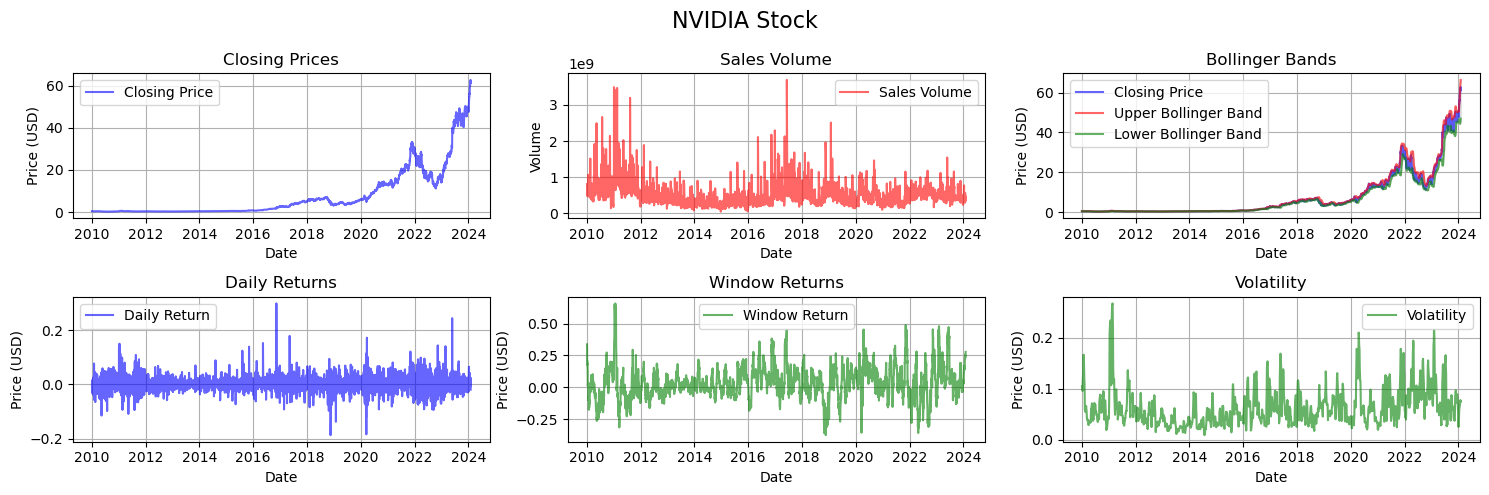

In [17]:
# Plotting the NVIDIA Statistics over the years
plotStockStats(stockMarketHistory=stockMarketHistory, title='NVIDIA Stock')

In [18]:
ds = stockPriceManager(stockSymbol='NVDA', feature='Close', windowSize=config['window'], predictionDate='2024-01-01', pathsConfig=pathsConfig)
x_train, y_train, x_val, y_val, x_test, y_test = ds.trainTestSplit()
# x_train.shape, y_train.shape
# x_val.shape, y_val.shape
# x_test.shape, y_test.shape

In [19]:
ds.df.head()

,Train_0,Train_1,Train_2,Train_3,Train_4,Train_5,Train_6,Train_7,Train_8,Train_9,...,Train_11,Train_12,Train_13,Train_14,Train_15,Train_16,Train_17,Train_18,Target,Target_Date
0,0.004390,0.004514,0.004568,0.004399,0.004418,0.004299,0.004016,0.004125,0.003997,0.003760,...,0.003874,0.003732,0.003463,0.003591,0.003349,0.003550,0.003294,0.002974,0.003513,2010-02-02
1,0.004514,0.004568,0.004399,0.004418,0.004299,0.004016,0.004125,0.003997,0.003760,0.003906,...,0.003732,0.003463,0.003591,0.003349,0.003550,0.003294,0.002974,0.003513,0.003591,2010-02-03
2,0.004568,0.004399,0.004418,0.004299,0.004016,0.004125,0.003997,0.003760,0.003906,0.003874,...,0.003463,0.003591,0.003349,0.003550,0.003294,0.002974,0.003513,0.003591,0.003655,2010-02-04
3,0.004399,0.004418,0.004299,0.004016,0.004125,0.003997,0.003760,0.003906,0.003874,0.003732,...,0.003591,0.003349,0.003550,0.003294,0.002974,0.003513,0.003591,0.003655,0.003207,2010-02-05
4,0.004418,0.004299,0.004016,0.004125,0.003997,0.003760,0.003906,0.003874,0.003732,0.003463,...,0.003349,0.003550,0.003294,0.002974,0.003513,0.003591,0.003655,0.003207,0.003353,2010-02-08


In [ ]:
# Extract the market informations for all stocks
# for symbol in sp500Stocks.Symbol:
#     X = getStockMarketInformation(stockSymbol=symbol, config=config, pathsConfig=pathsConfig)
#     if X is None:
#         print("Failed", symbol)
#         break
#     else:
#         print(f"Processed {symbol}")

---
---

In [26]:
# !pip install pytorch-forecasting

In [29]:
# from pytorch_forecasting.models import TemporalFusionTransformer

# model = TemporalFusionTransformer.from_dataset(
#     dataset,
#     learning_rate=0.01,
#     hidden_size=16,
#     attention_head_size=1,
#     dropout=0.1
# )


---

<div align="center">

## ADD OTHER SECTIONS - PORTFOLIO OPTIMIZATION PROGRAM
</div>

---

<div align="center">
    
---
## Conclusions
---
</div>

> ADD CONCLUSIONS

<div align="center">

---
## Bibliographic References
---
</div>

1. AUTHOR (YEAR). __*TITLE*__. Available [here](_LINK_)

LINKS:
- https://medium.com/@kasperjuunge/yfinance-10-ways-to-analyze-stock-prices-18d2062ab35c

___
## Video Presentation (YouTube Video)

Moreover, you can find the **Video** for our **Project's Presentation [here](https://youtu.be/dQw4w9WgXcQ?si=M2fOqMOebz5GcYoj)**
___
## Final Considerations

$\quad$ If there is any difficulty on downloading or executing this project, please contact us via:

- **Email**:
    - [Francisco Macieira](https://github.com/franciscovmacieira) &#8594; `up202207166@edu.fc.up.pt`
    - [Gonçalo Esteves](https://github.com/EstevesX10) &#8594; `up202203947@edu.fc.up.pt`
    - [Nuno Gomes](https://github.com/NightF0x26) &#8594; `up202206195@edu.fc.up.pt`

---
---
## Training TESTS

---
### LSTM
---

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=5e-4,
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=10,
    min_lr=1e-5
)

# Check the model architecture
model.summary()

# Train the model
model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=32, epochs=50)

y_pred = model.predict(x_test)

y_pred[0][0], y_test[0]

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 19, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
88/88 [==============================] - 6s 31ms/step - loss: 2.2416e-04 - mean_absolute_error: 0.0073 - val_loss: 0.0019 - val_mean_absolute_error: 0.0323
Epoch 2/50
88

(0.9782488, 0.9824193055312462)

---
### Light Gradient Boosting Machine
---

In [25]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define the model
model = LGBMRegressor(
    objective='regression',
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1
)

# Train with early stopping
model.fit(
    x_train, y_train,
    eval_set=[(x_val, y_val)],  # Validation set for early stopping
    eval_metric='rmse',         # Metric for evaluation
)

# Get best iteration manually
best_iteration = model.best_iteration_

# Predict using the best iteration
y_pred = model.predict(x_test, num_iteration=best_iteration)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 0.708901774441745


[0.27336569] [0.98241931]
RMSE: 0.709053612263494
MAE: 0.709053612263494


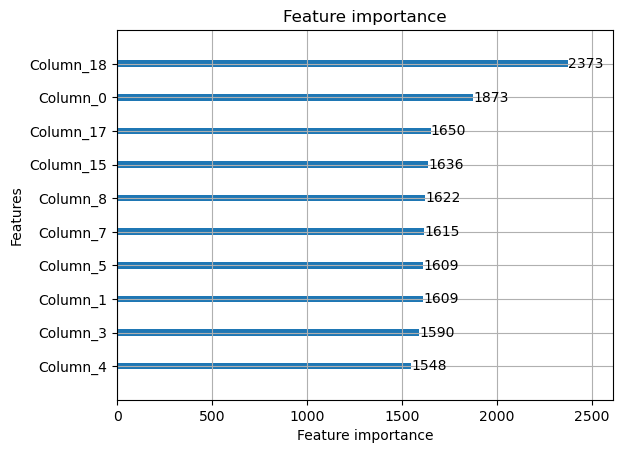

In [48]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Create LightGBM datasets
train_data = lgb.Dataset(x_train, label=y_train)
val_data = lgb.Dataset(x_val, label=y_val, reference=train_data)

# Define parameters
params = {
    'objective': 'regression',       # Task: regression
    'metric': 'rmse',                # Evaluation metric: RMSE
    'boosting_type': 'gbdt',         # Gradient Boosted Decision Tree
    'num_leaves': 31,                # Max leaves per tree
    'learning_rate': 0.05,           # Learning rate
    'feature_fraction': 0.9,         # Fraction of features per iteration
    'bagging_fraction': 0.8,         # Fraction of data per iteration
    'bagging_freq': 5,               # Bagging frequency
    'verbose': -1                    # Suppress output
}

# Train the LightGBM model
model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,            # Max boosting iterations
    valid_sets=[train_data, val_data],  # Training and validation datasets
    # early_stopping_rounds=50,        # Stop if no improvement after 50 rounds
    # verbose_eval=10                  # Display progress every 10 iterations
)

# Make predictions on the validation set
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

print(y_pred, y_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plot feature importance
lgb.plot_importance(model, max_num_features=10)
plt.show()


---
### PROPHET BY FACEBOOK
---

             ds          y
0    2010-01-04   0.423952
1    2010-01-05   0.430143
2    2010-01-06   0.432894
3    2010-01-07   0.424410
4    2010-01-08   0.425328
...         ...        ...
3538 2024-01-25  61.603775
3539 2024-01-26  61.017906
3540 2024-01-29  62.451595
3541 2024-01-30  62.760529
3542 2024-01-31  61.513794

[3543 rows x 2 columns]


17:29:49 - cmdstanpy - INFO - Chain [1] start processing
17:29:51 - cmdstanpy - INFO - Chain [1] done processing


             ds
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3540 2024-01-29
3541 2024-01-30
3542 2024-01-31
3543 2024-02-01
3544 2024-02-02

[3545 rows x 1 columns]


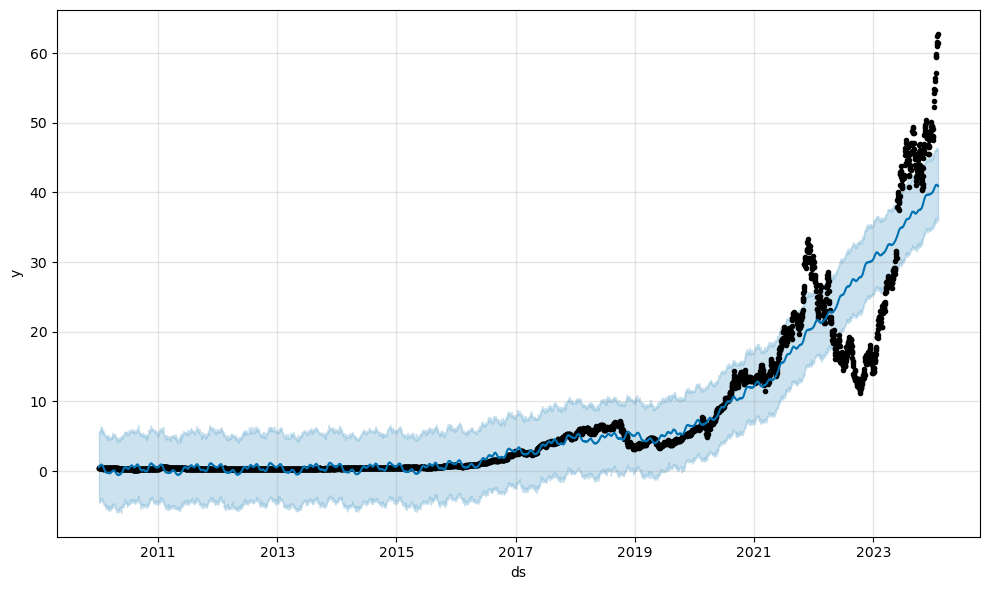

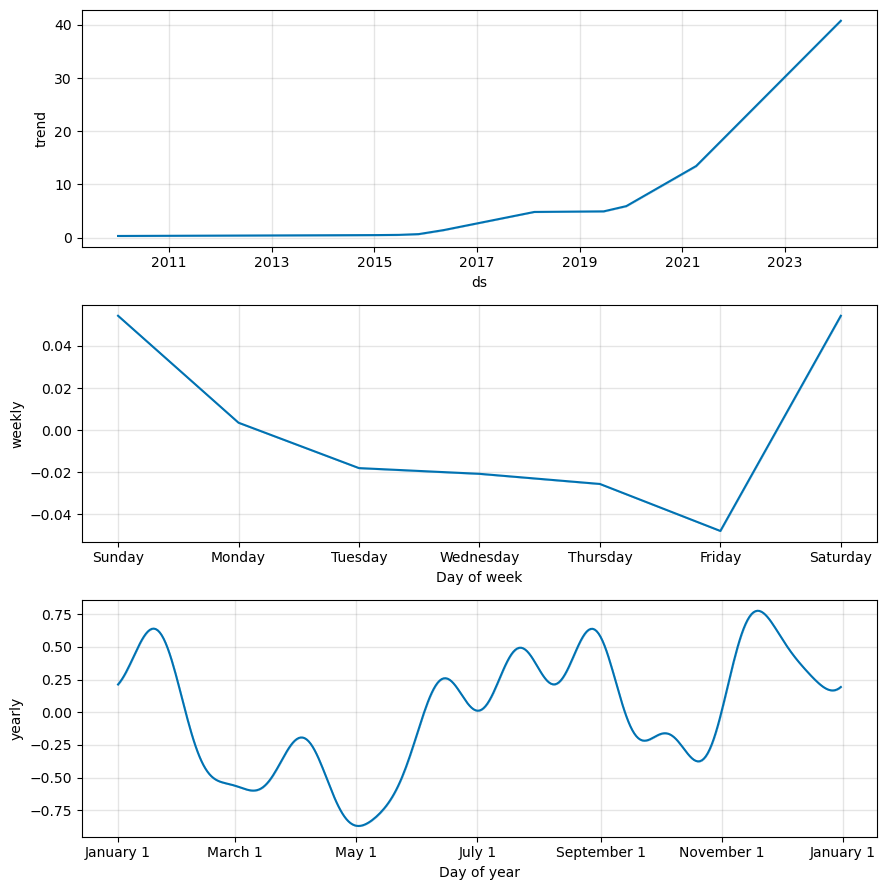

3541    62.760529
3542    61.513794
Name: y, dtype: float64
3543    40.955558
3544    40.901511
Name: yhat, dtype: float64
Mean Absolute Error: 21.208626475406664


In [42]:
import pandas as pd

df = stockMarketHistory[['Date', 'Close']]
df['ds'] = pd.to_datetime(df['Date'])
df['y'] = df['Close']
df=df.drop(columns=['Date', 'Close'])

print(df)
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model to your data
model.fit(df)

daysToForecast = 2

# Create a DataFrame for future dates (e.g., next 7 days)
future = model.make_future_dataframe(periods=daysToForecast)  # Add 7 days to the forecast
print(future)  # View the new future dates

# Make predictions
forecast = model.predict(future)

import matplotlib.pyplot as plt

# Plot the forecast
model.plot(forecast)
plt.show()

# Plot the forecast components (trend, seasonality)
model.plot_components(forecast)
plt.show()

# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

from sklearn.metrics import mean_absolute_error

# Subset actual and predicted values for validation
actual = df['y'].iloc[-daysToForecast:]
predicted = forecast['yhat'].iloc[-daysToForecast:]

print(actual)
print(predicted)

mae = mean_absolute_error(actual, predicted)
print(f"Mean Absolute Error: {mae}")


---
---